In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def metadata(titulo, ejex, ejey):
    plt.title(titulo, fontsize = 60, fontweight='bold')
    plt.xlabel(ejex, fontsize = 35)
    plt.ylabel(ejey, fontsize = 35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    return
def cifras_signif(i, cifras):
    return str('{:g}'.format(float('{:.{p}g}'.format(i, p = cifras))))

In [3]:
datos = pd.read_csv(
    'C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_4\\Ej_9.txt',
    delimiter = '\t',
    decimal = ',',
    )

In [4]:
datos.head()

,Est.N,X,Y,Z[m],delta_Tmin[C],Test
0,4,13869,18007,27,-2.2,NaN
1,5,13759,18096,40,-0.3,NaN
2,7,13456,18242,36,-1.0,NaN
3,9,14296,18207,60,3.4,*
4,10,13950,18800,40,2.4,NaN


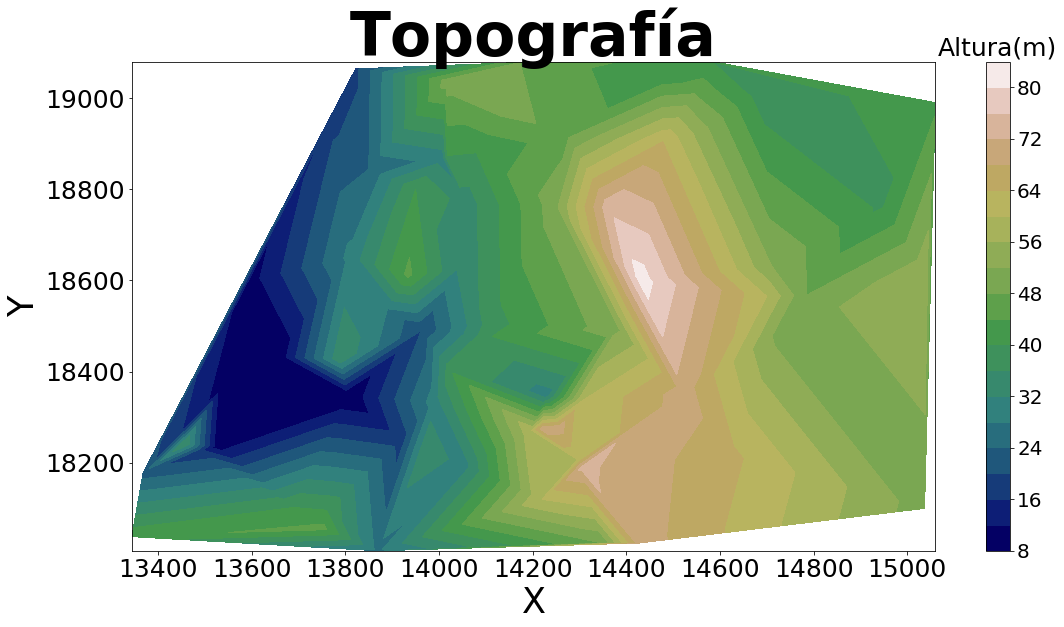

In [7]:
plt.figure(figsize = (18, 9))
plt.tricontourf(datos['X'], datos['Y'], datos['Z[m]'], 20, cmap = 'gist_earth')
metadata('Topografía', 'X', 'Y')
clb = plt.colorbar()
clb.ax.tick_params(labelsize = 20)
clb.ax.set_title('Altura(m)', fontsize = 25)
plt.savefig('C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_4\\topografia.png')

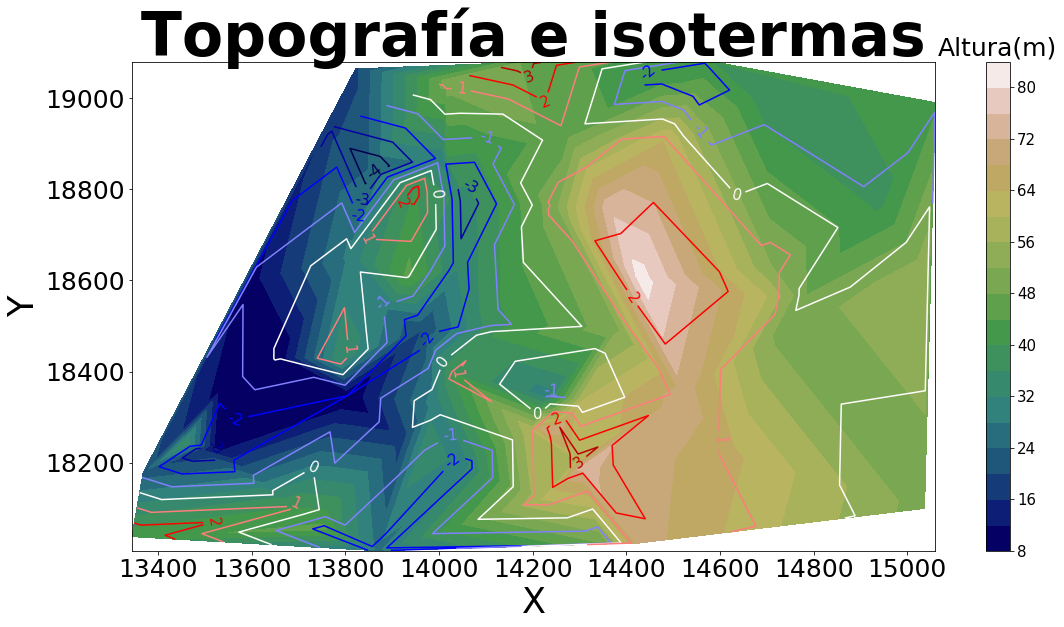

In [6]:
datos_filtrados = datos.drop('Test', 1).dropna()
grafico, ax2 = plt.subplots(figsize = (18, 9))
contorno = plt.tricontour(datos_filtrados['X'], datos_filtrados['Y'],
                          datos_filtrados['delta_Tmin[C]'], cmap = 'seismic',
                          levels = [-4,-3,-2,-1,0,1,2,3,4],
                          )
plt.tricontourf(datos['X'], datos['Y'], datos['Z[m]'],
                20, cmap = 'gist_earth'
                )
metadata('Topografía e isotermas', 'X', 'Y')
clb = plt.colorbar()
clb.ax.tick_params(labelsize = 15)
clb.ax.set_title('Altura(m)', fontsize = 25)
ax2.clabel(contorno, contorno.levels, inline = True, fmt = '%1.0f', fontsize = 15)
plt.savefig('C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_4\\topografia_isotermas.png')

In [10]:
np.corrcoef(datos_filtrados['Z[m]'], datos_filtrados['delta_Tmin[C]'])

array([[1.        , 0.65261727],
       [0.65261727, 1.        ]])